In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
#1st question start here
#Loading the dataset
dftitanic = pd.read_csv(r"D:\ad\tutorials\Data-analys\data-preprocessing-sujithacls\assignment_preprocessing\titanic_dataset.csv")
dftitanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
#to get the number of rows and columns
dftitanic.shape

(891, 12)

In [6]:
#listing the columns of the dataset
#3. Question basic details
dftitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#listing the nullvalues 
dftitanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
dftitanic.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [9]:
#4th question starts here
#fill in the missing null values with its median value
#dftitanic['Age'].fillna(dftitanic['Age'].median(), inplace=True)
#median of a age column
mean_col_age=dftitanic['Age'].median() 
dftitanic.Age=dftitanic['Age'].fillna(mean_col_age)


In [10]:
#fill in the missing null values with its median value
dftitanic['Embarked'].fillna(dftitanic['Embarked'].mode()[0], inplace=True)

In [11]:

# To remove the null values we can use fillna method 
# For example:
dftitanic.Cabin = dftitanic.Cabin.fillna("unknown")
print(dftitanic.isnull().sum())
dftitanic.isna().sum()
# after filling all the missin values in the dataset


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<Axes: xlabel='Age'>

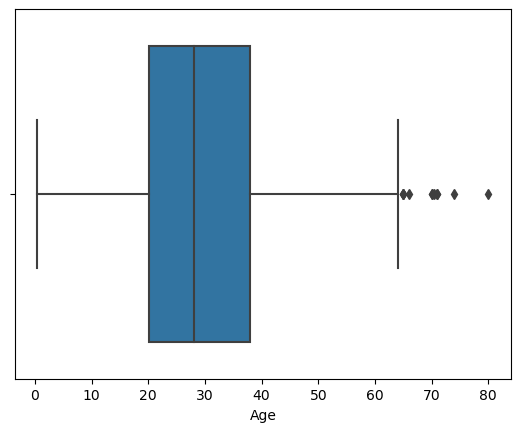

In [51]:
#5. Question starts here 

#Box plot showing outliers
sns.boxplot(x=dftitanic["Age"])

<Axes: xlabel='Fare'>

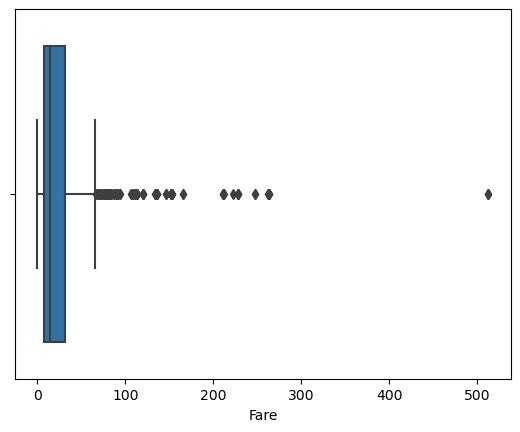

In [52]:
#Box plot showing outliers for Fare
sns.boxplot(x=dftitanic["Fare"])

In [12]:
# Handling Outlier s :-outlier identification
#interquartile range is a measure of statistical dispersion and is calculated as the difference between 
#75th and 25th percentiles. the Quartiles divide the data set into four equal parts.
#The values that separate parts are called the first, second, and third quartiles.
Q1=dftitanic['Fare'].quantile(0.25)
Q3=dftitanic['Fare'].quantile(0.75)
IQR=Q3-Q1
print('Oultier for Fare: ',IQR)


Q5=dftitanic['Age'].quantile(0.25)
Q7=dftitanic['Age'].quantile(0.75)
IQR1=Q7-Q5
print('Oultier for Age: ',IQR1)




Oultier for Fare:  23.0896
Oultier for Age:  13.0


In [13]:
#Outlier treatment using IQR
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
dftitanic['Fare']=np.where(dftitanic['Fare']>upper_whisker,upper_whisker,np.where(dftitanic['Fare']<lower_whisker,lower_whisker,dftitanic['Fare']))

#outlier for age

lower_whisker1 = Q5 -(whisker_width*IQR1)
upper_whisker1 = Q7 + (whisker_width*IQR1)
dftitanic['Age']=np.where(dftitanic['Age']>upper_whisker1,upper_whisker1,np.where(dftitanic['Age']<lower_whisker1,lower_whisker1,dftitanic['Age']))

dftitanic.describe()





,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.039282,0.523008,0.381594,24.046813
std,257.353842,0.486592,0.836071,12.072074,1.102743,0.806057,20.481625
min,1.000000,0.000000,1.000000,2.500000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,54.500000,8.000000,6.000000,65.634400


<Axes: xlabel='Age'>

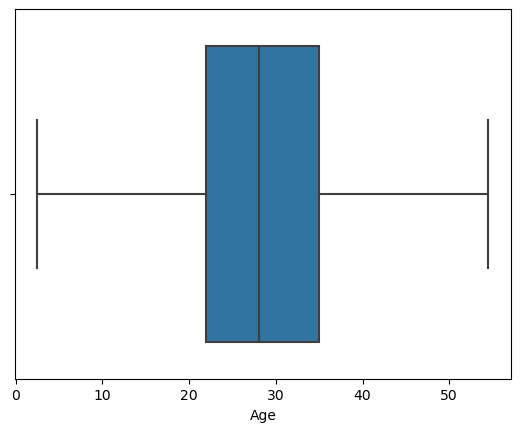

In [46]:
#Box plot showing after handling outliers
sns.boxplot(x=dftitanic["Age"])

<Axes: xlabel='Fare'>

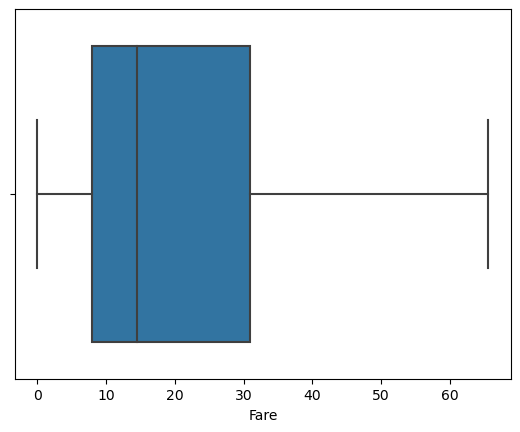

In [47]:
# Box plot showing after handling outlier for fare column

sns.boxplot(x=dftitanic["Fare"])

In [16]:
#6.min max scaling on feature set
# the minimum of feature is made equal to zero and the maximum of feature equal to one.
#MinMax Scaler shrinks the data within the given range, usually of 0 to 1.
#It transforms data by scaling features to a given range. 
#It scales the values to a specific value range without changing the shape of the original distribution.
#X_scaled = (X – X.min / (X.max – X.min)
#To perform Min-Max scaling on a column, you can use the MinMaxScaler class from the sklearn.preprocessing module. 
from sklearn.preprocessing import MinMaxScaler

# Min-Max Normalization

df = pd.DataFrame(dftitanic['Survived'])

scaler = MinMaxScaler()
df[['Survived']] = scaler.fit_transform(df[['Survived']])
df


,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,0.0
889,1.0
